In [5]:
import numpy as np
import pandas as pd
from git import Repo
import json
from matplotlib import pyplot as plt

local_repo = Repo(path=".")
branch = local_repo.active_branch.name
agent = branch

with open(f'./agents/{agent}/epochs.json') as file:
  epochs = json.load(file)
with open(f'./agents/{agent}/evaluations.json') as file:
  evaluations = json.load(file)

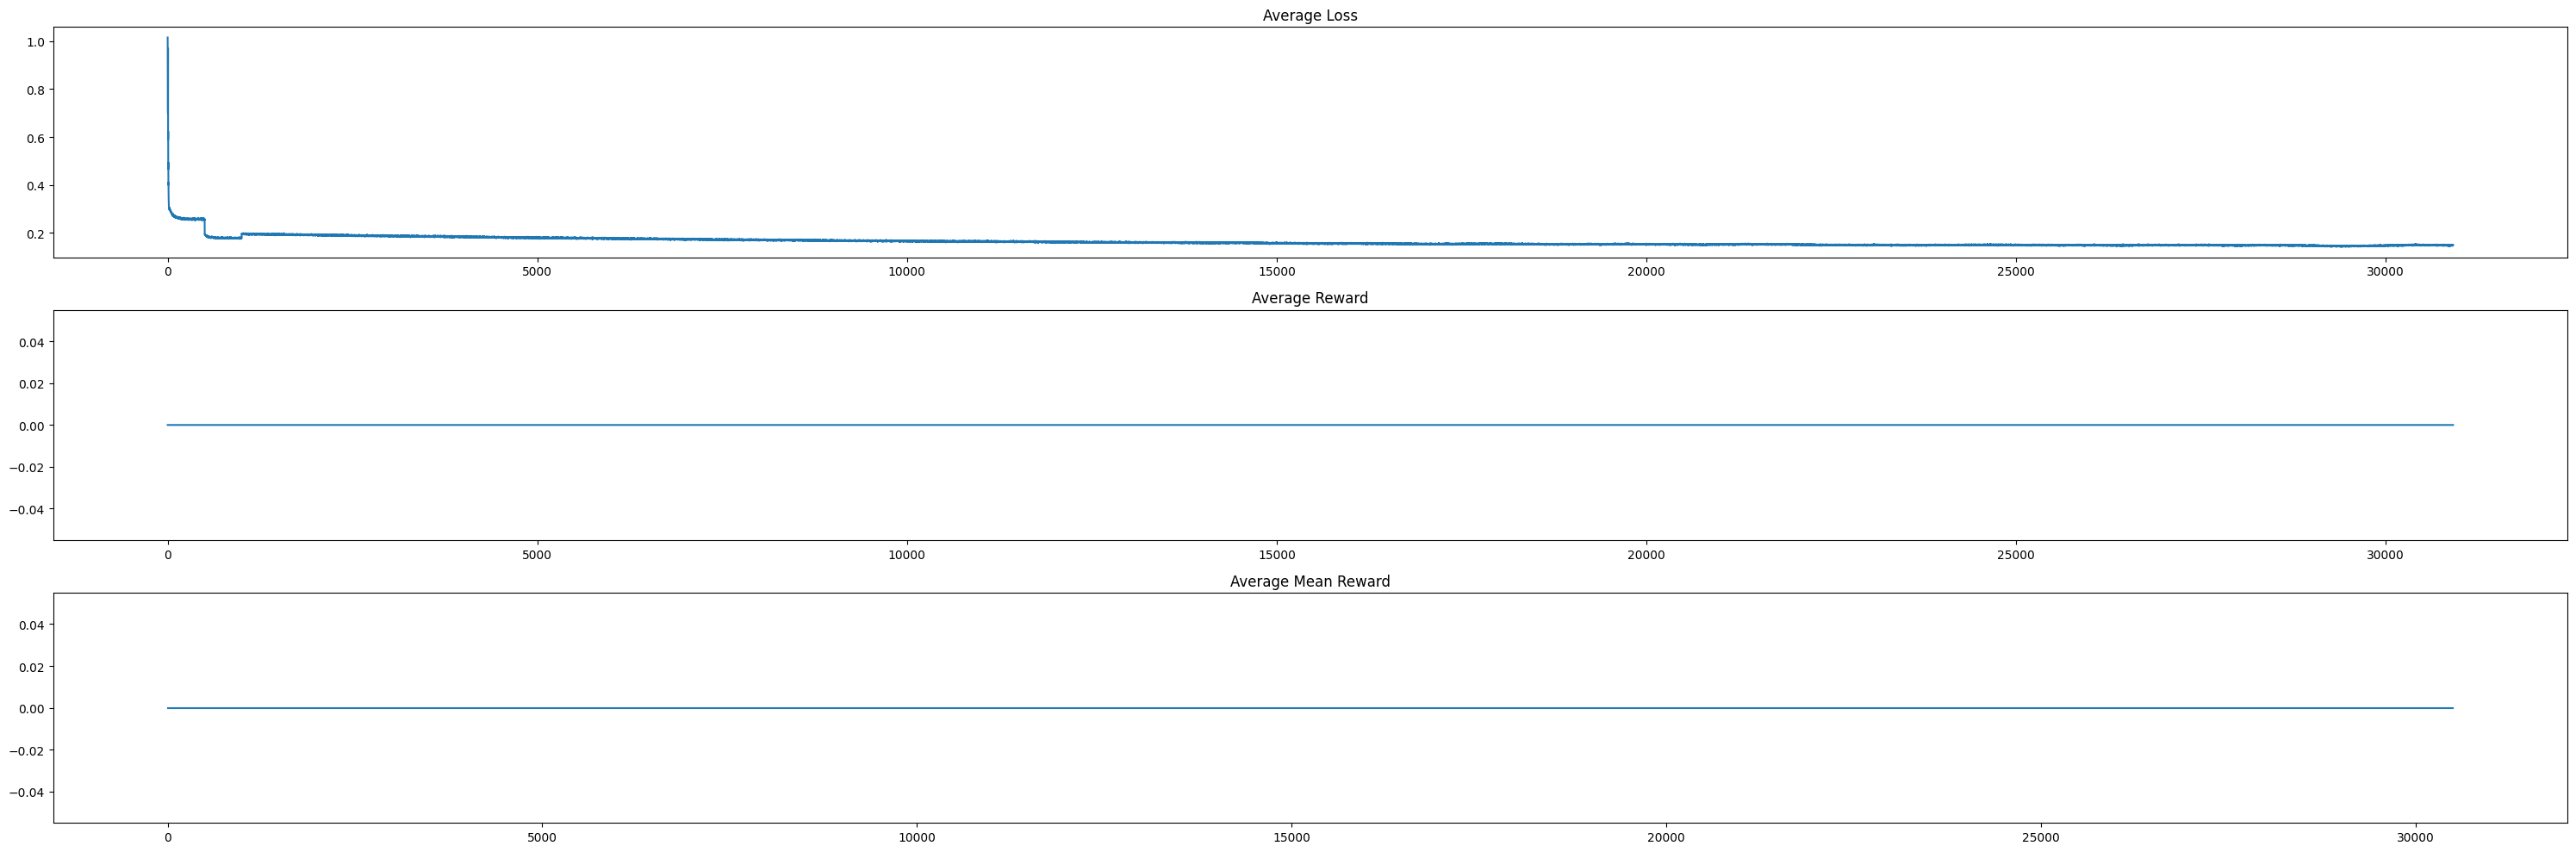

In [6]:
x = [i['epoch'] for i in epochs][:]
y_loss = [i['average_loss']**0.5 for i in epochs if i['epoch'] in x]
y_rewards = [i['average_reward'] for i in epochs if i['epoch'] in x]

x_reward_mean = []
y_reward_mean = []
target_interval = 500

for i in range(0,len(epochs),target_interval):
  data = epochs[i:i+target_interval]
  reward = [i['average_reward'] for i in data]
  x_reward_mean.append(i)
  y_reward_mean.append(sum(reward) / len(reward))

figure, axis = plt.subplots(3,1)
figure.set_figheight(10)
figure.set_figwidth(30)

axis[0].set_title("Average Loss")
axis[0].plot(x,y_loss)

axis[1].set_title("Average Reward")
axis[1].plot(x,y_rewards)


axis[2].set_title("Average Mean Reward")
axis[2].plot(x_reward_mean,y_reward_mean)


figure.tight_layout()


<BarContainer object of 18 artists>

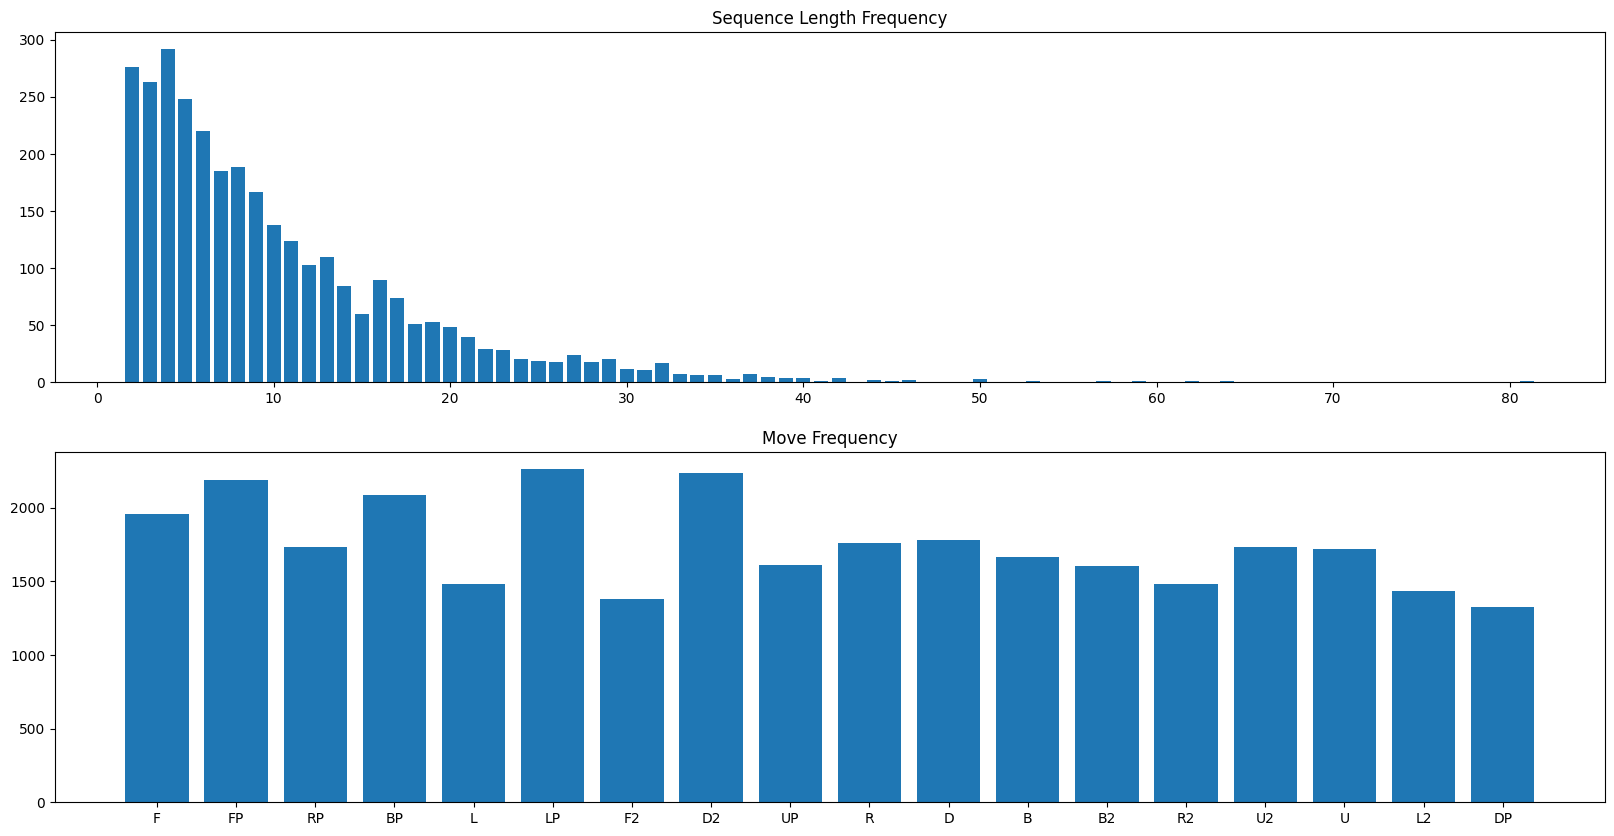

In [7]:
lengths = {}
moves = {}
for item in evaluations:
  if item['count'] in lengths:
    lengths[item['count']] += 1
  else:
    lengths[item['count']] = 1
  for move in item['moves']:
    if move not in moves:
      moves[move] = 1
    else:
      moves[move] += 1

figure, axis = plt.subplots(2,1)
figure.set_figheight(10)
figure.set_figwidth(20)

axis[0].set_title("Sequence Length Frequency")
axis[0].bar(lengths.keys(),lengths.values())


axis[1].set_title("Move Frequency")
axis[1].bar(moves.keys(),moves.values())


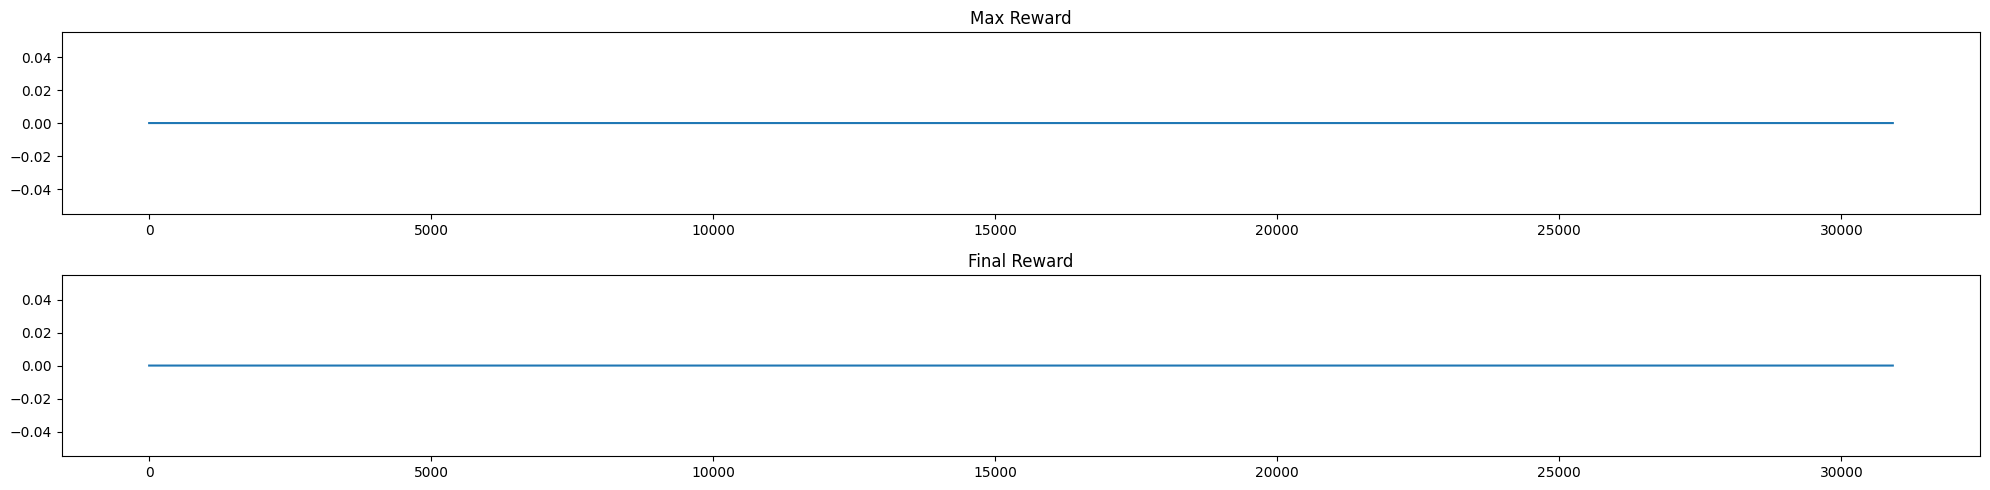

In [8]:
epochs_x = [x['epoch'] for x in evaluations]
max_rewards = [x['reward_max'] for x in evaluations if x['epoch'] in epochs_x]
final_rewards = [x['reward_final'] for x in evaluations if x['epoch'] in epochs_x]

figure, axis = plt.subplots(2,1)
figure.set_figheight(5)
figure.set_figwidth(20)

axis[0].set_title("Max Reward")
axis[0].plot(epochs_x,max_rewards)

axis[1].set_title("Final Reward")
axis[1].plot(epochs_x,final_rewards)

figure.tight_layout()